In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage import io, measure, filters

training_imgs_dir = "/raid/data/BBBC038/training/"

# Load All Data

In [10]:
img_paths = []
img_names = []
mask_png_list = []
mask_colls = []

for img_name in os.listdir(training_imgs_dir):
    path_image = f"{training_imgs_dir}/{img_name}/images/{img_name}.png" # path of each image png
    path_masks = f"{training_imgs_dir}/{img_name}/masks/*.png"           # path to each directory of masks for each image
    
    coll = io.collection.ImageCollection(path_masks)     # image collection storing all masks for given image
    mask_dir = f"{training_imgs_dir}/{img_name}/masks/"       
    mask_dir = os.listdir(mask_dir)                           # list of all masks for an image
    
    img_names.append(img_name)                                # store list of image names
    img_paths.append(path_image)                              # store paths to each image
    mask_png_list.append(mask_dir)                            # store lists of mask names
    mask_colls.append(coll)                              # store mask collections
    
# sample
# io.imshow(img_paths[0])
# plt.figure()
# io.imshow(mask_colls[0][0])
# print(mask_png_list[0][0])
# print(img_names[0])

# Composite Mask of Nuclei Into Single Image
* use numpy to concactenate image arrays
* multiply each array by a different number to tell the difference when combining arrays

In [11]:
img = io.imread(img_paths[0])  # numpy.ndarray
masks = mask_colls[0]          # mask collection

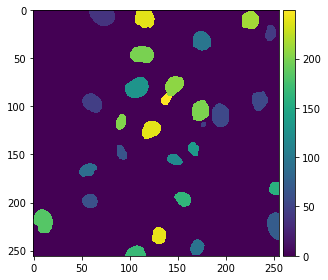

In [14]:
sample = 0
for i in range(len(masks)):
    sample += masks[i] * (5 * np.random.sample()) % 255
    # put all masks into a single image
    # multiply each mask by random values for easier visualization
io.imshow(sample, cmap='viridis')

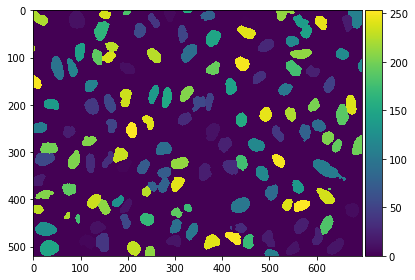

In [13]:
from composites import composite_masks

comp = composite_masks(mask_colls[1])
io.imshow(comp)

# Create Labelled Matrix
* Need to read documentation, etc.

In [ ]:
n = 12
l = 256
# np.random.seed(0)
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = filters.gaussian(im, sigma= l / (4. * n))
blobs = im > 0.7 * im.mean()
all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(blobs, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(all_labels, cmap='nipy_spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
nuclei = sample > 0
all_labels = measure.label(nuclei)
nuclei_labels = measure.label(nuclei, background=0)

plt.figure(figsize=(9,3.5))
plt.subplot(131)
plt.imshow(nuclei, cmap='gray')

plt.subplot(132)
plt.imshow(all_labels, cmap='nipy_spectral')
plt.tight_layout()
plt.show()
# issue at approx [75, 140]
# because nuclei are touching, label identifies them as one object